In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
%matplotlib inline

# Extend PATH Variable
import sys
sys.path.append("../../../src/")

import nanonets_utils
import nanonets

def nand_fitness(I : np.array):

    on  = (I[0] + I[1] + I[2])/3
    off = I[3]
    res = np.sqrt(((I[0] - on)**2 + (I[1] - on)**2 + (I[2] - on)**2 + (I[3] - off)**2)/4)

    return (on - off)/res

def return_best_gate(current, fitness, gate='XOR'):

    gate_volts  = fitness.sort_values(by=f'{gate} Fitness', ascending=False, ignore_index=True).loc[:9,[f'C{i}' for i in range(1, 10)] + ['G',f'{gate} Fitness']]
    current_val = current[(current['C1']==gate_volts.loc[0,'C1']) & (current['C2']==gate_volts.loc[0,'C2'])]

    gate_volts.insert(9,'O',0)
    
    volt_val       = np.repeat(gate_volts.values,4,axis=0)
    i1             = np.tile([0.0,0.0,0.01,0.01], 10)
    i2             = np.tile([0.0,0.01,0.0,0.01], 10)
    volt_val       = pd.DataFrame(volt_val)
    volt_val[12]   = i1
    volt_val[13]   = i2
    volt_val       = volt_val[[0,12,13,1,2,3,4,5,6,7,8,9,10]]
    volt_val       = volt_val.iloc[:4,:]

    return volt_val, current_val, gate_volts

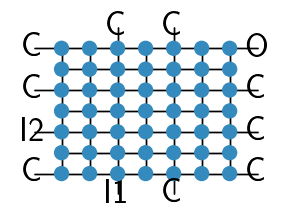

In [13]:
network_topology    = "cubic"
topology_parameter  = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[2,0,0],[0,2,0],[4,0,0],[0,4,0],[6,0,0],[0,6,0],[6,2,0],[2,6,0],[6,4,0],[4,6,0],[6,6,0]]
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

with plt.style.context(["science","bright"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    fig, ax = nanonets_utils.display_network(np_network_sim=np_network_sim, fig=fig, ax=ax, node_size=100,
                                             provide_electrode_labels=['C','I1','I2','C','C','C','C','C','C','C','C','O'], font_size=25)

In [14]:
df1, df2    = nanonets_utils.get_boolean_data("data/", N=7, N_e=12, on_state=[0.01], i1_col=1, i2_col=2, o_col=11)
dff         = nanonets_utils.fitness(df1, 9)
gate        = 'NAND'

volt_val, current_val, gate_volts = return_best_gate(df1, dff, gate)
gate_volts

,C1,C2,C3,C4,C5,C6,C7,C8,C9,O,G,NAND Fitness
0,-0.0020,-0.0498,-0.0090,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,0,-0.0262,24.407455
1,0.0192,-0.0202,0.0157,-0.0381,-0.0494,0.0398,0.0180,-0.0050,0.0034,0,0.0730,7.572334
2,-0.0295,-0.0141,-0.0016,0.0467,-0.0203,0.0276,-0.0286,-0.0355,0.0312,0,0.0696,7.338203
3,-0.0342,0.0165,0.0238,0.0088,0.0483,-0.0001,-0.0364,0.0186,0.0102,0,-0.0180,4.996759
4,0.0293,0.0122,0.0066,-0.0347,0.0313,0.0483,0.0134,0.0081,-0.0351,0,0.0283,4.746934
5,0.0499,0.0132,0.0387,0.0089,-0.0093,0.0152,0.0169,0.0147,0.0082,0,0.0776,4.628805
6,0.0039,-0.0035,-0.0139,-0.0429,-0.0305,0.0434,0.0160,-0.0121,-0.0206,0,-0.0202,4.468555
7,-0.0478,0.0166,0.0195,-0.0352,-0.0119,-0.0040,-0.0452,0.0206,0.0283,0,-0.0652,4.060340
8,0.0294,0.0429,-0.0129,-0.0390,-0.0478,-0.0444,0.0417,0.0093,-0.0073,0,-0.0314,3.807553
9,0.0452,0.0138,-0.0375,0.0459,-0.0453,0.0185,0.0487,0.0184,0.0019,0,-0.0341,3.561544


In [15]:
current_val

,I1,I2,C1,C2,C3,C4,C5,C6,C7,C8,C9,G,Jumps_eq,Jumps,Current,Error
9840,0.00,0.00,-0.002,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,-0.0262,10000.0,100000.0,0.1630,0.0563
9841,0.00,0.01,-0.002,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,-0.0262,10000.0,100000.0,0.1687,0.0653
9842,0.01,0.00,-0.002,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,-0.0262,10000.0,100000.0,0.1693,0.0655
9843,0.01,0.01,-0.002,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,-0.0262,10000.0,100000.0,0.0860,0.0333


<ErrorbarContainer object of 3 artists>

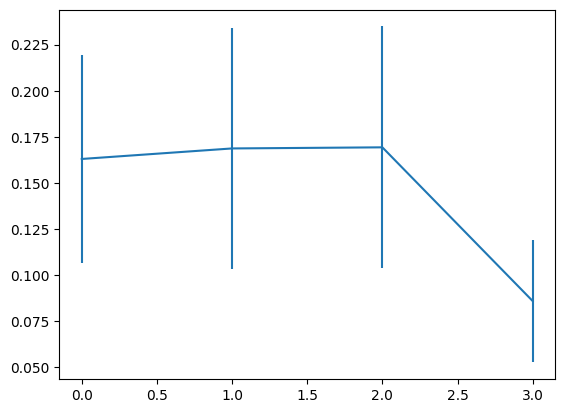

In [16]:
plt.errorbar(np.arange(4), current_val['Current'], current_val['Error'])

In [17]:
volt_val

,0,12,13,1,2,3,4,5,6,7,8,9,10
0,-0.002,0.00,0.00,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,0.0,-0.0262
1,-0.002,0.00,0.01,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,0.0,-0.0262
2,-0.002,0.01,0.00,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,0.0,-0.0262
3,-0.002,0.01,0.01,-0.0498,-0.009,0.0214,0.0055,0.0267,0.0026,0.0205,0.0189,0.0,-0.0262


In [7]:
# Run Simulation
sim_dic = {
    "error_th"    : 0.01,
    "max_jumps"   : 100000,
    "eq_steps"    : 10000
}

np_network_sim = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)
np_network_sim.run_const_voltages(voltages=volt_val.values, target_electrode=11, save_th=0.1, sim_dic=sim_dic)
results = pd.DataFrame(np_network_sim.return_output_values())

<ErrorbarContainer object of 3 artists>

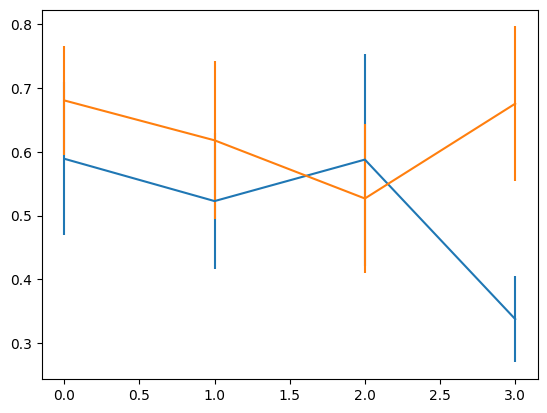

In [145]:
plt.errorbar(np.arange(4), current_val['Current'], current_val['Error'])
plt.errorbar(np.arange(4), results[2], results[3])

In [143]:
print(nand_fitness(results[2].values))

-1.2251166862678633
